# Import libraries for working with data.

In [126]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

# **Descriptions of Loan Data**

**Descriptions for the column names based on the data provided:**


*   *id*: Unique identifier for each record.

*   *person_age*: Age of the individual, categorized into ranges.

*   *person_income*: Income of the individual, categorized into income ranges.

*   *person_home_ownership*: Homeownership status, which includes categories like 'RENT', 'MORTGAGE', etc.

*   *person_emp_length*: Employment length of the individual, categorized into ranges based on years.

*   *loan_intent*: The purpose of the loan, with categories such as 'EDUCATION', 'MEDICAL', etc.

*   *loan_grade*: The credit grade of the loan, such as 'A', 'B', etc.

*   *loan_amnt*: Loan amount, categorized into ranges.

*   *loan_int_rate*: Loan interest rate, categorized into percentage ranges.

*   *loan_percent_income*: Percentage of the individual’s income that the loan represents, categorized into - ranges.

*   *cb_person_default_on_file*: Whether the person has a history of loan default, with values 'true' or 'false'.

*   *cb_person_cred_hist_length*: Length of the individual’s credit history, categorized into ranges.

*   *loan_status*: with values representing whether the loan status approval( binary values)


The dataset is a about loan applications, including personal, financial, and loan details. It's likely used for predicting whether a person will default on a loan, making it a binary classification problem. The goal is to figure out which applicants are at higher risk of not paying back their loans based on their age, income, employment, loan purpose, credit history, and other related information.

# Importing a data set

In [127]:
df_train = pd.read_csv('/content/train.csv')
df_test  = pd.read_csv('/content/test.csv')
df_sub = pd.read_csv('/content/sample_submission.csv')

df_train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


# Data graphs

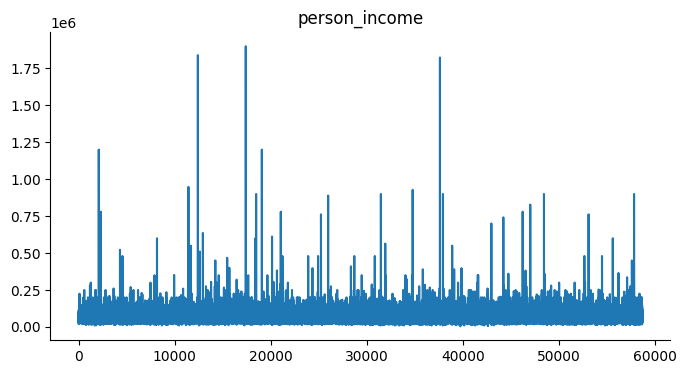

In [128]:
df_train['person_income'].plot(kind='line', figsize=(8, 4), title='person_income')
plt.gca().spines[['top', 'right']].set_visible(False)

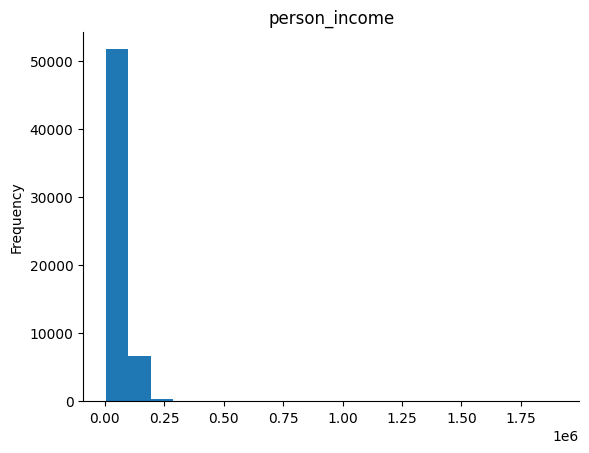

In [129]:
df_train['person_income'].plot(kind='hist', bins=20, title='person_income')
plt.gca().spines[['top', 'right',]].set_visible(False)

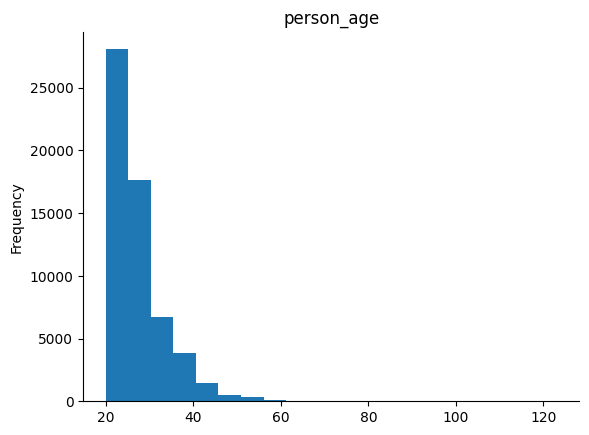

In [130]:
df_train['person_age'].plot(kind='hist', bins=20, title='person_age')
plt.gca().spines[['top', 'right',]].set_visible(False)

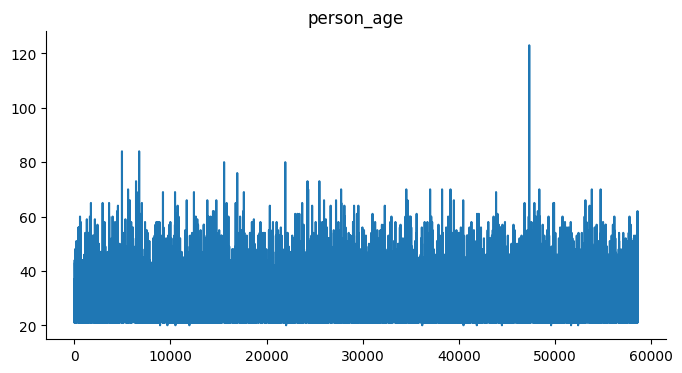

In [131]:
df_train['person_age'].plot(kind='line', figsize=(8, 4), title='person_age')
plt.gca().spines[['top', 'right']].set_visible(False)

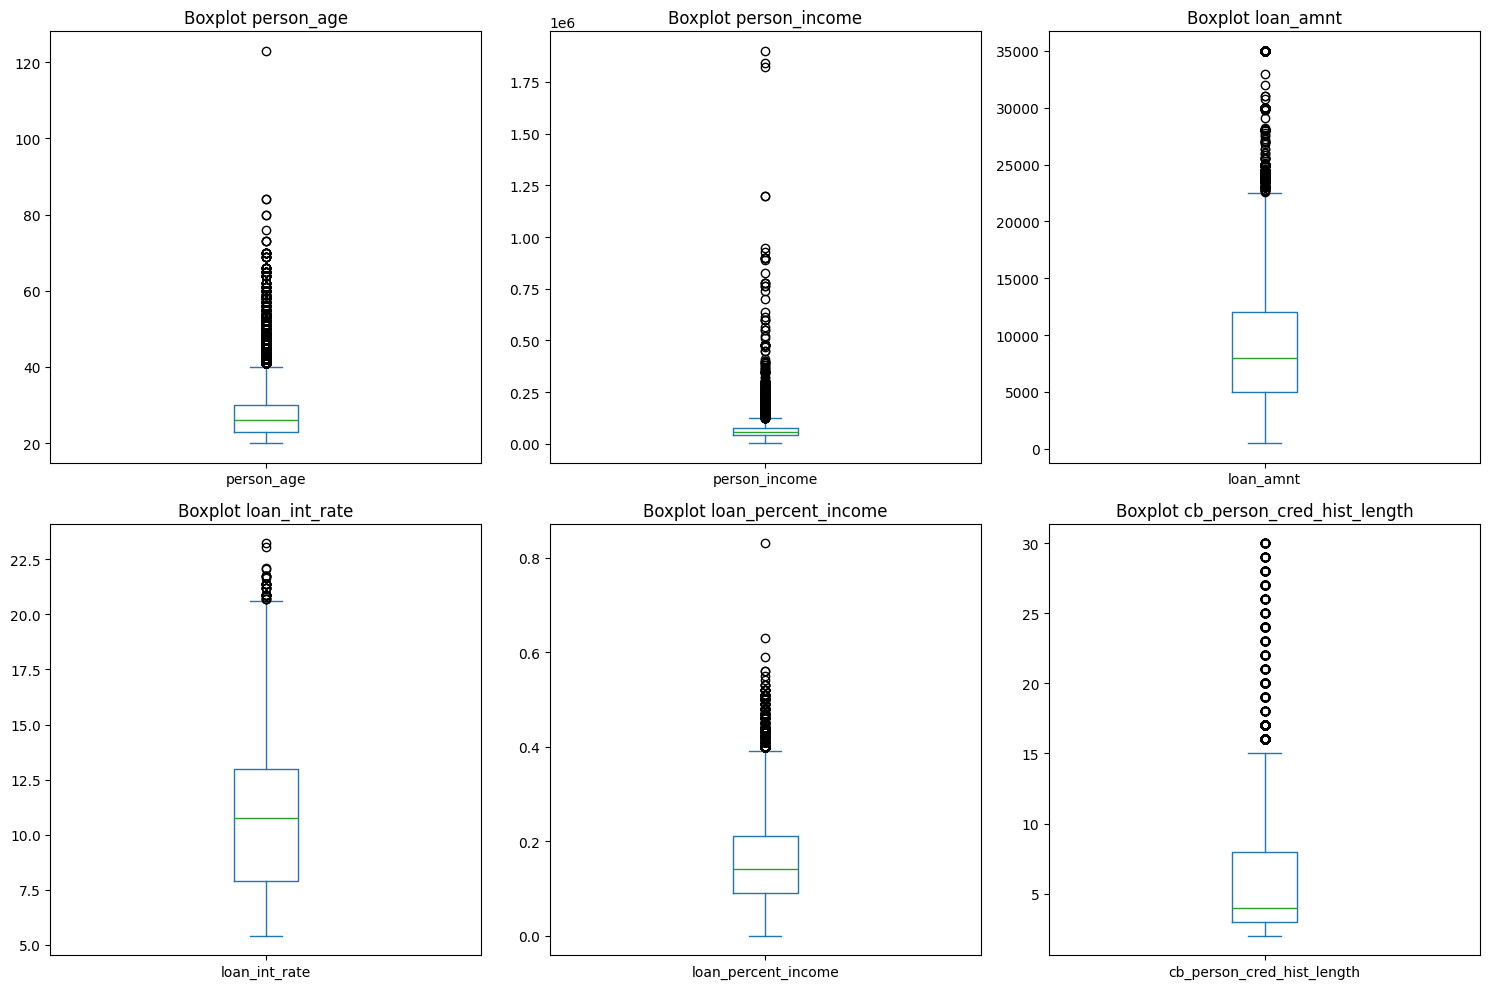

In [132]:
numeric_columns = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    df_train[col].plot(kind='box')
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

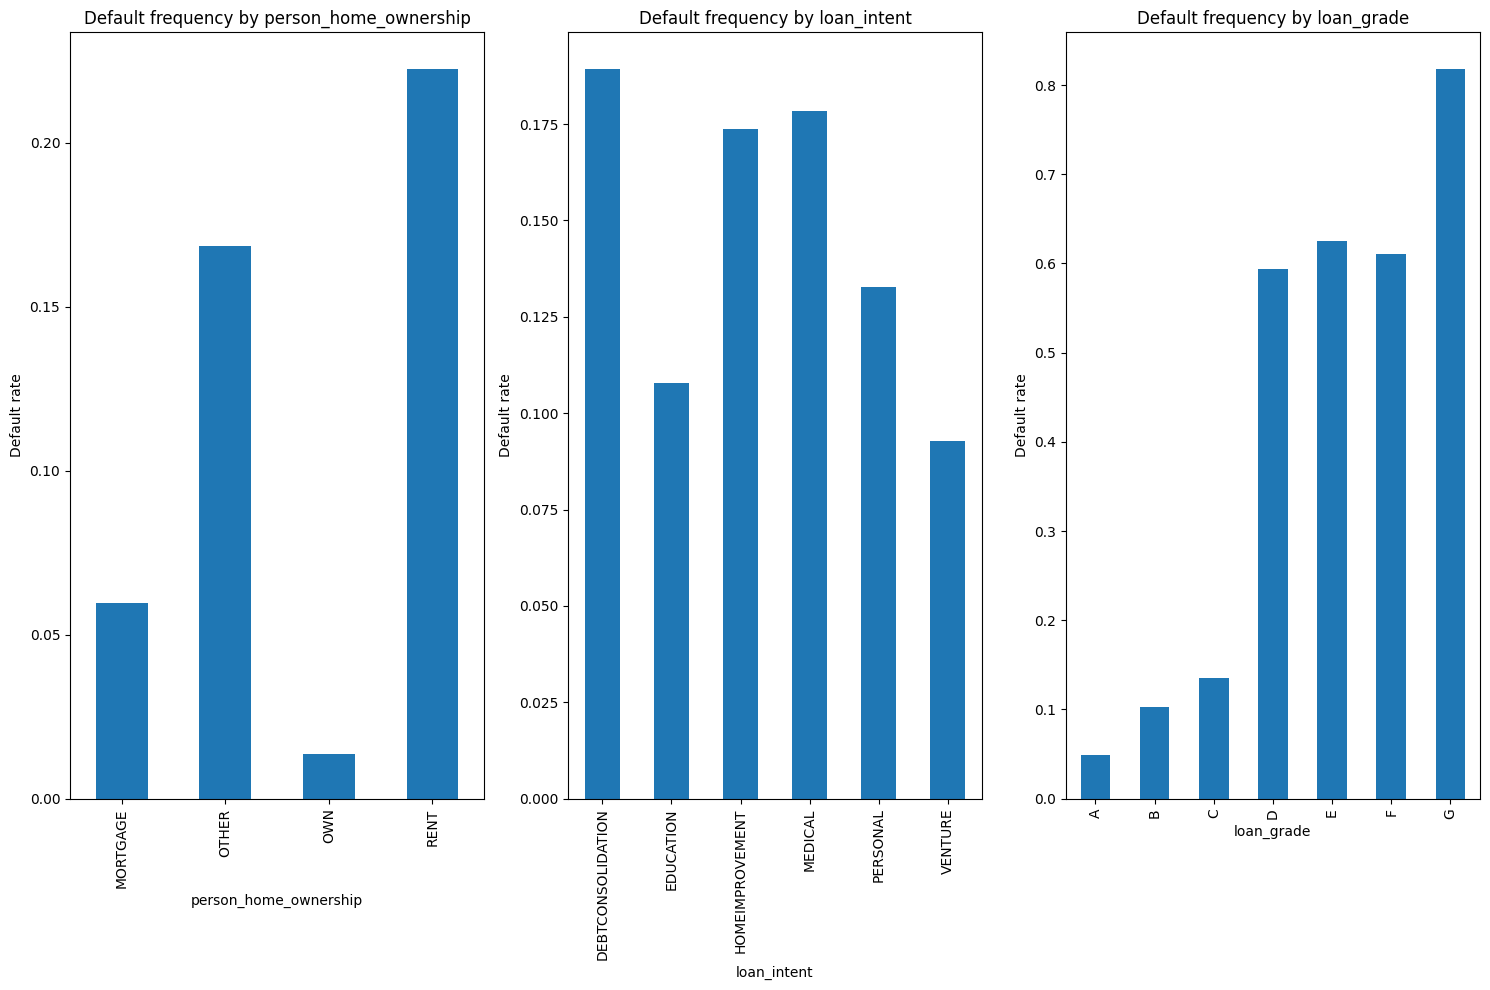

In [133]:
plt.figure(figsize=(15, 10))
categories = ['person_home_ownership', 'loan_intent', 'loan_grade']

for i, col in enumerate(categories, 1):
    plt.subplot(1, 3, i)
    df_train.groupby(col)['loan_status'].mean().plot(kind='bar')
    plt.title(f'Default frequency by {col}')
    plt.ylabel('Default rate')
plt.tight_layout()
plt.show()

# Dataset preparation

In [134]:
df_train.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [135]:
df_train.shape

(58645, 13)

In [136]:
df_train.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [137]:
df_train = df_train.drop(columns=['id'])
df_test = df_test.drop(columns=['id'])

In [138]:
df_train.shape,df_test.shape

((58645, 12), (39098, 11))

In [139]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.4+ MB


In [140]:
df_train.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0
cb_person_default_on_file,0


In [141]:
df_test.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0
cb_person_default_on_file,0


In [142]:
df_train.duplicated().sum()

0

In [143]:
df_test.duplicated().sum()

0

In [144]:
for column in df_train.select_dtypes(include='object').columns:
    print(f"Unique values ​​in a column '{column}': {df_train[column].unique()}")

Unique values ​​in a column 'person_home_ownership': ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
Unique values ​​in a column 'loan_intent': ['EDUCATION' 'MEDICAL' 'PERSONAL' 'VENTURE' 'DEBTCONSOLIDATION'
 'HOMEIMPROVEMENT']
Unique values ​​in a column 'loan_grade': ['B' 'C' 'A' 'D' 'E' 'F' 'G']
Unique values ​​in a column 'cb_person_default_on_file': ['N' 'Y']


In [145]:
for column in df_test.select_dtypes(include='object').columns:
    print(f"Unique values ​​in a column '{column}': {df_test[column].unique()}")

Unique values ​​in a column 'person_home_ownership': ['RENT' 'MORTGAGE' 'OWN' 'OTHER']
Unique values ​​in a column 'loan_intent': ['HOMEIMPROVEMENT' 'PERSONAL' 'VENTURE' 'DEBTCONSOLIDATION' 'EDUCATION'
 'MEDICAL']
Unique values ​​in a column 'loan_grade': ['F' 'C' 'E' 'A' 'D' 'B' 'G']
Unique values ​​in a column 'cb_person_default_on_file': ['N' 'Y']


In [146]:
df_train['cb_person_default_on_file'] = df_train['cb_person_default_on_file'].map({'Y': 1, 'N': 0})
df_test['cb_person_default_on_file'] = df_test['cb_person_default_on_file'].map({'Y': 1, 'N': 0})

In [147]:
label_encoders = {}
for column in df_train.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_train[column] = le.fit_transform(df_train[column])
    label_encoders[column] = le

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  int64  
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  int64  
 5   loan_grade                  58645 non-null  int64  
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  int64  
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 5.4 MB


In [148]:
label_encoders = {}
for column in df_test.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_test[column] = le.fit_transform(df_test[column])
    label_encoders[column] = le

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  39098 non-null  int64  
 1   person_income               39098 non-null  int64  
 2   person_home_ownership       39098 non-null  int64  
 3   person_emp_length           39098 non-null  float64
 4   loan_intent                 39098 non-null  int64  
 5   loan_grade                  39098 non-null  int64  
 6   loan_amnt                   39098 non-null  int64  
 7   loan_int_rate               39098 non-null  float64
 8   loan_percent_income         39098 non-null  float64
 9   cb_person_default_on_file   39098 non-null  int64  
 10  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 3.3 MB
